In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures 

Phase 1 :

In [2]:
df=pd.read_csv('kc_house_data.csv', sep=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.shape

(21613, 21)

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.isnull().sum().sum()

0

In [7]:
df=df.drop('id',axis=1)
df=df.drop('view',axis=1)
df=df.drop('zipcode',axis=1)
df=df.drop('sqft_living15',axis=1)
df=df.drop('sqft_lot15',axis=1)
df.shape

(21613, 16)

In [8]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,47.5112,-122.257
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,47.7210,-122.319
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,47.7379,-122.233
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0,47.5208,-122.393
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0,47.6168,-122.045


Phase 2 :

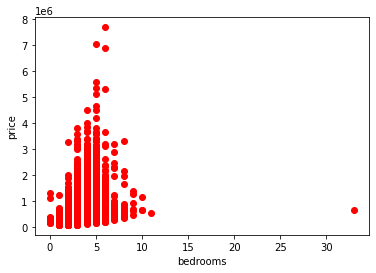

In [9]:
plt.plot(df.bedrooms,df.price,"ro")
plt.xlabel("bedrooms")
plt.ylabel("price")
plt.show()


In [10]:
df["bedrooms"].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [11]:
df.drop(df[df['bedrooms'] == 33].index, inplace = True)

In [12]:
df["bedrooms"].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

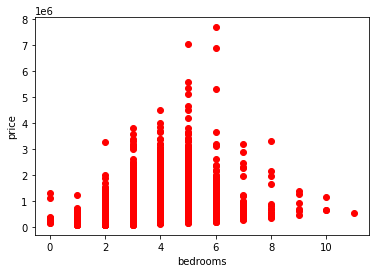

In [13]:
plt.plot(df.bedrooms,df.price,"ro")
plt.xlabel("bedrooms")
plt.ylabel("price")
plt.show()

The correlation between the price and the number of bedrooms isn't strong due to the fact that the price depends on other features, We can also observe the highest numbers of bedroom which is around [3,6].

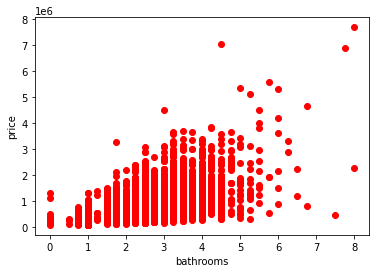

In [14]:
plt.plot(df.bathrooms,df.price,"ro")
plt.xlabel("bathrooms")
plt.ylabel("price")
plt.show()

The correlation between the number of bathrooms and the price is quite strong

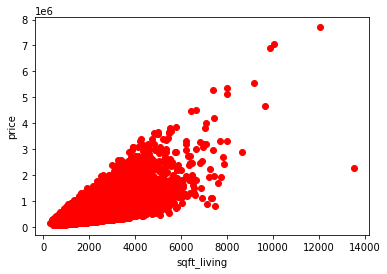

In [15]:
plt.plot(df.sqft_living,df.price,"ro")
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.show()

The correlation between the number of bathrooms and the living space is really strong

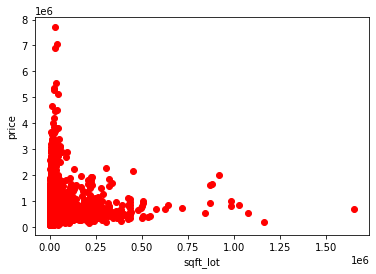

In [16]:
plt.plot(df.sqft_lot,df.price,"ro")
plt.xlabel("sqft_lot")
plt.ylabel("price")
plt.show()

small houses are more expensive (low correlation)

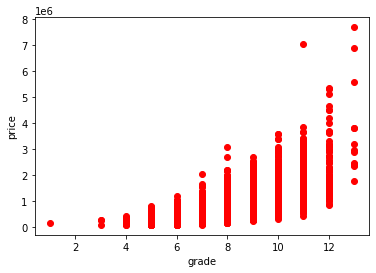

In [17]:
plt.plot(df.grade,df.price,"ro")
plt.xlabel("grade")
plt.ylabel("price")
plt.show()

Strong correlation between the price and the grade

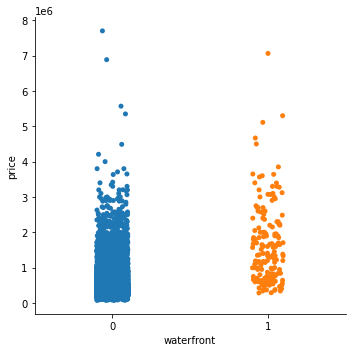

In [18]:
sns.catplot(x='waterfront',y="price",data=df)

The number of houses with no waterfront is much higher than those with a waterfront

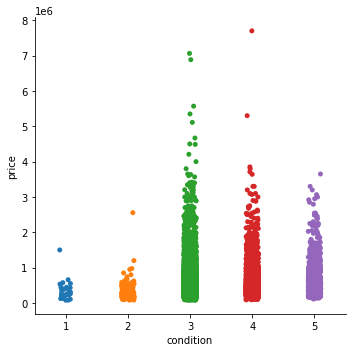

In [19]:
sns.catplot(x='condition',y="price",data=df)

Low correlation most houses are in good condition,most people prefer having a large living space than a house in perfect condition

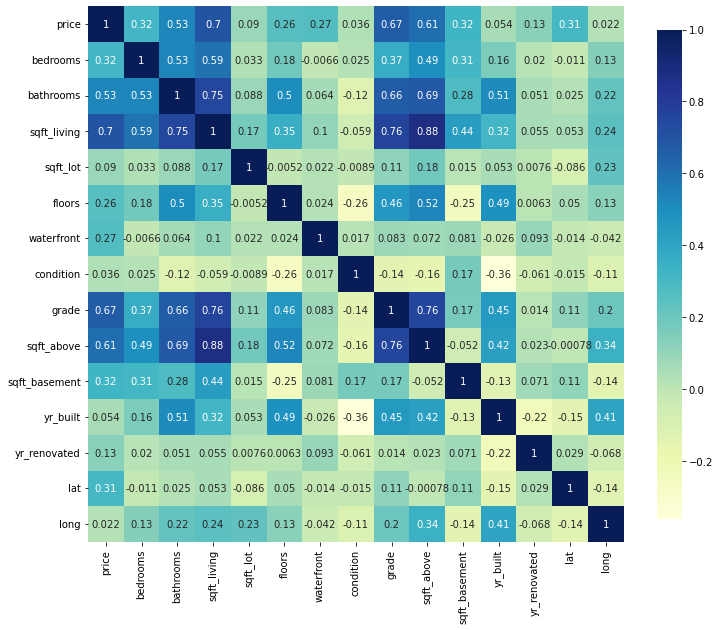

In [20]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap ='YlGnBu',

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 10 }

        )
plot_correlation_map( df )

The price is strongly correlated with these features by order from strongest to lowest : sqft_living,grade,sqft_above,bathrooms

Phase 3 :

In [21]:
df['sqft_living'].shape

(21612,)

In [22]:
y= df["price"].values
x= df['sqft_living'].values.reshape(-1,1)

In [23]:
df['sqft_living'].shape

(21612,)

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30) #splitting data with test size of 20%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

In [25]:
print("MSE with linear regression :", mean_squared_error(y_test,predicted))
print("R squared with linear regression :", metrics.r2_score(y_test,predicted))

MSE with linear regression : 63626156706.13171
R squared with linear regression : 0.4689763547454001


In [26]:
print("a :",model.coef_)
print("b : ",model.intercept_)

a : [283.91023548]
b :  -49164.72722670704


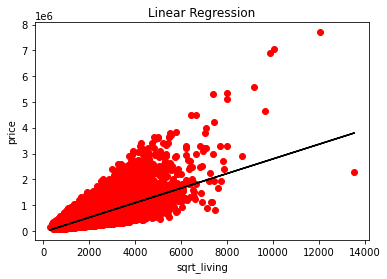

In [27]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqrt_living")
plt.plot(x,model.predict(x),color="k")
plt.show()

Phase 4 :

In [28]:
#extract x and y from our data
x=df[["grade","sqft_living","sqft_above","bathrooms","bedrooms","floors","condition","lat","long"]]  #we have more than one input
y=df["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30) #splitting data with test size of 20%

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE with multi-linear regression", mean_squared_error(y_test,predicted))
print("R squared with multi-linear regression", metrics.r2_score(y_test,predicted))

MSE with multi-linear regression 45068654994.93957
R squared with multi-linear regression 0.6238571885982178


 
 MSE with multi-linear regression < MSE with linear regression
                                 AND
 R squared with multi-linear regression > R squared with linear regression
 
 We can conclude from these two observations that the model with multi linear-regression is more precise than the model with linear regression

We observed in the data visualization phase a slight curve in the price/grade and in the price/sqft_lot scatter plots, so we are going to use "grade" as a feature in the polynomial linear regression below :

In [29]:
x=df["grade"].values.reshape(-1,1)
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30) #splitting data with test size of 20%
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
print("x before transformation: ", x_test)
print("x after transformation: ", x_test_)
predicted = lg.predict(x_test_)

print("MSE with polynomial linear regression : ", metrics.mean_squared_error(y_test, predicted))
print("R squared with polynomial linear regression : ", metrics.r2_score(y_test,predicted))

x before transformation:  [[8]
 [8]
 [8]
 ...
 [9]
 [7]
 [7]]
x after transformation:  [[ 1.  8. 64.]
 [ 1.  8. 64.]
 [ 1.  8. 64.]
 ...
 [ 1.  9. 81.]
 [ 1.  7. 49.]
 [ 1.  7. 49.]]
MSE with polynomial linear regression :  57299629854.04602
R squared with polynomial linear regression :  0.5217775221381162


In [30]:
x=x=df[["grade","sqft_lot","sqft_living"]]  #we have more than one input
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30) #splitting data with test size of 20%
lg=LinearRegression()
poly=PolynomialFeatures(degree=4)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE with polynomial multi-linear regression : ", metrics.mean_squared_error(y_test, predicted))
print("R squared with polynomial multi-linear regression : ", metrics.r2_score(y_test,predicted))

MSE with polynomial multi-linear regression :  49743341891.69853
R squared with polynomial multi-linear regression :  0.5848422707585923


MSE with polynomial multi-linear regression < MSE with polynomial linear regression AND R squared with polynomial multi-linear regression > R squared with polynomial linear regression

We can conclude from these two observations that the model with polynomial multi-linear regression is more precise than the model with polynomial linear regression